In [5]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import quandl

In [13]:
intuit = quandl.get('WIKI/INTU')

In [4]:
intuit.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1993-03-22,30.00,30.50,28.5,28.50,145800.0,0.0,1.0,2.332933,2.371815,2.216286,2.216286,1749600.0
1993-03-23,29.00,30.50,28.0,30.50,166700.0,0.0,1.0,2.255168,2.371815,2.177404,2.371815,2000400.0
1993-03-24,30.00,30.50,29.0,29.75,84100.0,0.0,1.0,2.332933,2.371815,2.255168,2.313491,1009200.0
1993-03-25,29.75,29.75,28.5,28.50,86300.0,0.0,1.0,2.313491,2.313491,2.216286,2.216286,1035600.0
1993-03-26,29.00,29.00,28.5,28.50,110500.0,0.0,1.0,2.255168,2.255168,2.216286,2.216286,1326000.0


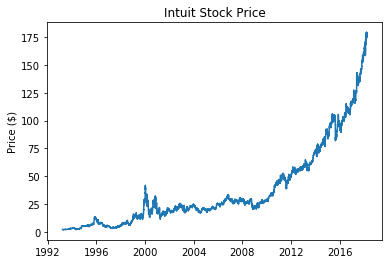

In [14]:
plt.plot(intuit.index, intuit['Adj. High'])
plt.title('Intuit Stock Price')
plt.ylabel('Price ($)');
plt.show()

In [15]:
intuit.reset_index(level=0, inplace = True)
intuit.head(5)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1993-03-22,30.00,30.50,28.5,28.50,145800.0,0.0,1.0,2.332933,2.371815,2.216286,2.216286,1749600.0
1,1993-03-23,29.00,30.50,28.0,30.50,166700.0,0.0,1.0,2.255168,2.371815,2.177404,2.371815,2000400.0
2,1993-03-24,30.00,30.50,29.0,29.75,84100.0,0.0,1.0,2.332933,2.371815,2.255168,2.313491,1009200.0
3,1993-03-25,29.75,29.75,28.5,28.50,86300.0,0.0,1.0,2.313491,2.313491,2.216286,2.216286,1035600.0
4,1993-03-26,29.00,29.00,28.5,28.50,110500.0,0.0,1.0,2.255168,2.255168,2.216286,2.216286,1326000.0


In [16]:
intuit = intuit.rename(columns={'Date': 'ds', 'Adj. High': 'y'})

In [17]:
m = Prophet()
m.fit(intuit)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods=2*365, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7025,2020-03-22,185.754464,172.487308,197.985999
7026,2020-03-23,185.392263,172.421683,196.839091
7027,2020-03-24,185.345108,172.230257,197.425342
7028,2020-03-25,185.294550,172.530826,197.808912
7029,2020-03-26,185.252106,171.938607,197.280059


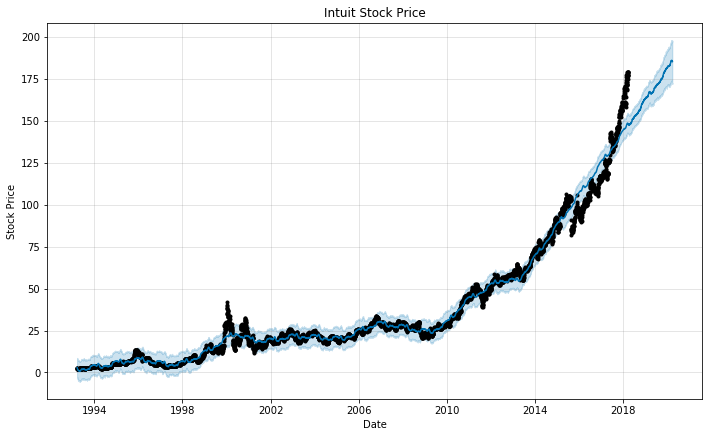

In [26]:
m.plot(forecast, xlabel = 'Date', ylabel = 'Stock Price')
plt.title('Intuit Stock Price')
plt.show()

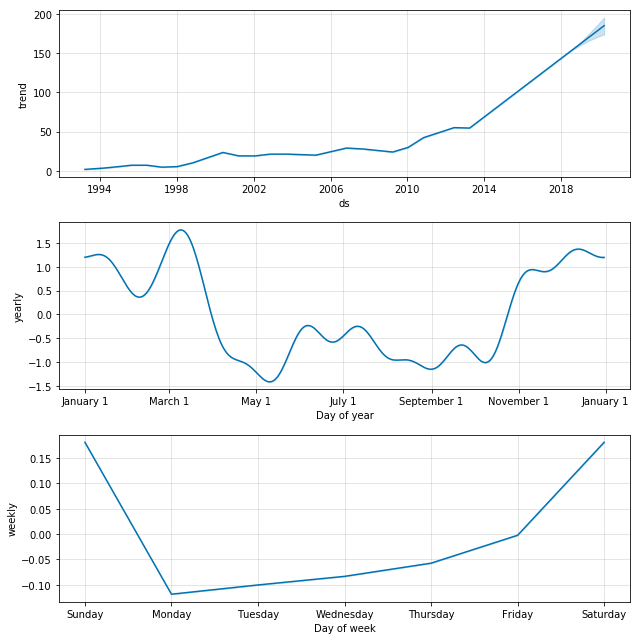

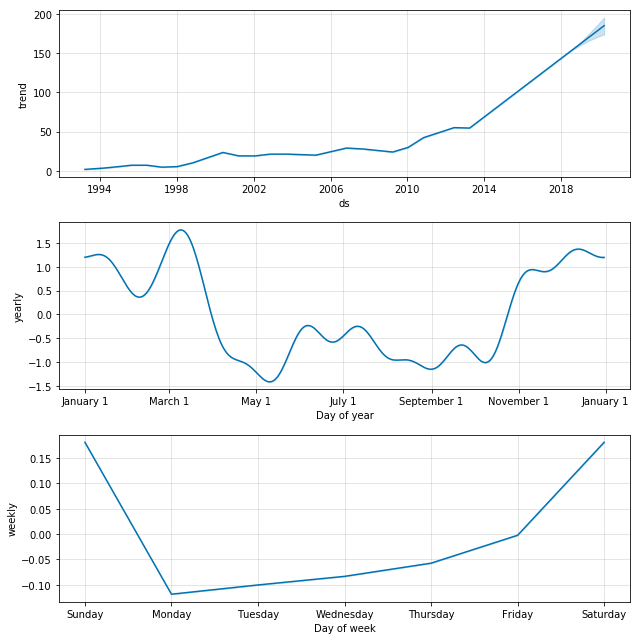

In [28]:
m.plot_components(forecast)
plt.show()